# Preparation

In [1]:
# !pip install pandas
# !pip install matplotlib

# Import libraries
import pandas as pd

from Utils import *

### Global Parameters

In [2]:
# Specify the data path
datafile = '../data/static-multimap-data.csv'

output_keys = ['Benchmark', 'Label', 'Distribution', 'CGSize', 'NumReps', 'NumInputs', \
               'Occupancy', 'GPU Time (sec)', 'Elem/s (elem/sec)', 'Bandwidth (GB/s)']

### Import Data

In [3]:
# Read csv file
rawdf = pd.read_csv(datafile)

# Filter out skipped tests
perfdf = rawdf[rawdf["Key"] == rawdf["Value"]].reset_index(drop=True)

# Set 'Int64' as CG Size type. Default is 'float64'.
perfdf['CGSize'] = perfdf['CGSize'].astype('Int64')

# Add labels
perfdf.loc[perfdf['NumReps'].isnull() & perfdf['CGSize'].isnull(), 'Label'] = perfdf["Key"] + " " + perfdf["Distribution"]
perfdf.loc[perfdf['Distribution'].isnull() & perfdf['CGSize'].isnull(), 'Label'] = perfdf["Key"]
perfdf.loc[perfdf['CGSize'].notnull(), 'Label'] = perfdf["Key"] + " " + perfdf['CGSize'].astype(str)

perfdf["Bandwidth (GB/s)"] = perfdf["GlobalMem BW (bytes/sec)"] / (1000 * 1000 * 1000)

# Trim data frame for visualization
perfdf = perfdf[output_keys]

# Visualization

### Visualization Parameters

In [4]:
# Get benchmark list
unique_bms = perfdf["Benchmark"].unique()
for it in unique_bms:
    print(it)

nvbench_static_multimap_single_insert
nvbench_static_multimap_multi_insert
nvbench_static_multimap_find
nvbench_static_multimap_find_all
nvbench_static_multimap_insert_cgsize


### Single-Value Insertion

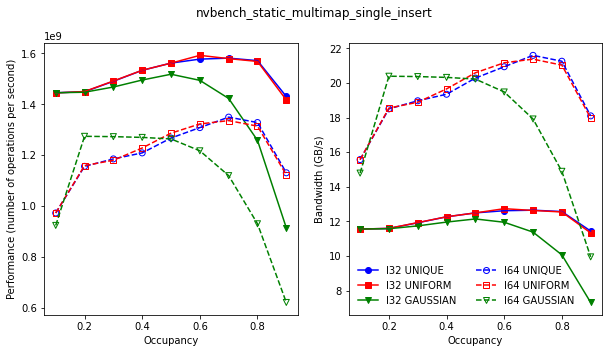

In [5]:
for bm in unique_bms:
    tmpdf = perfdf[perfdf["Benchmark"] == bm]    
    unique_labels = tmpdf["Label"].unique()
    
    if "single_insert" in bm:
        plot_perf(bm, tmpdf, "Occupancy", unique_labels)

### Multi-Value Insertion 

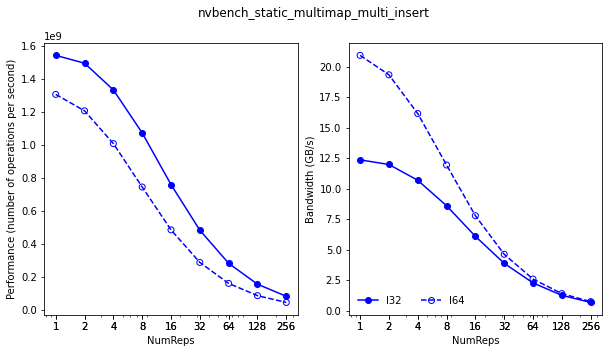

In [6]:
for bm in unique_bms:
    tmpdf = perfdf[perfdf["Benchmark"] == bm]
    unique_labels = tmpdf["Label"].unique()
    
    flag = "multi_insert" in bm
    if flag:
        plot_perf(bm, tmpdf, "NumReps", unique_labels, flag)

### Multi-Value Insertion by Varying CG Sizes

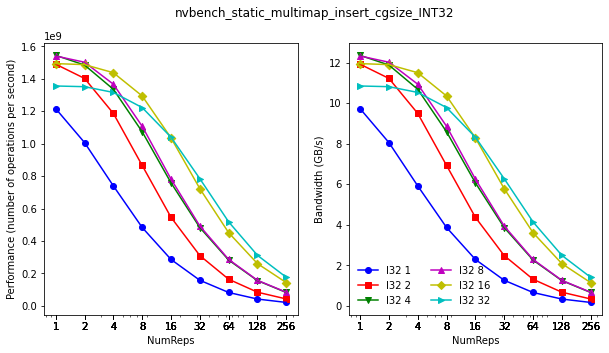

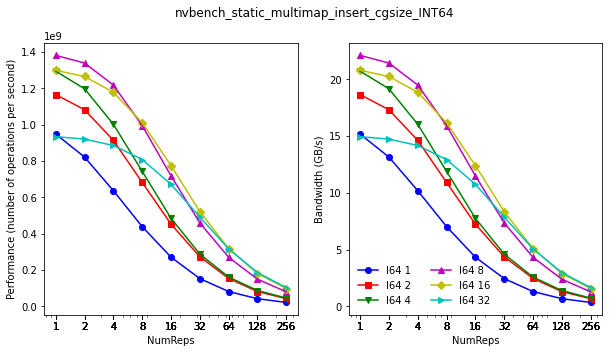

In [7]:
for bm in unique_bms:
    tmpdf = perfdf[perfdf["Benchmark"] == bm]
    
    flag = "insert_cgsize" in bm
    if flag:
        # Plot INT32 performance
        tmp_int32df = tmpdf[tmpdf["Label"].str.contains('I32')]
        unique_labels = tmp_int32df["Label"].unique()
        plot_perf(bm+'_INT32', tmp_int32df, "NumReps", unique_labels, flag, True)
        
        # Plot INT64 Performance
        tmp_int64df = tmpdf[tmpdf["Label"].str.contains('I64')]
        unique_labels = tmp_int64df["Label"].unique()
        plot_perf(bm+'_INT64', tmp_int64df, "NumReps", unique_labels, flag, True)

### Single-Value Retrieval

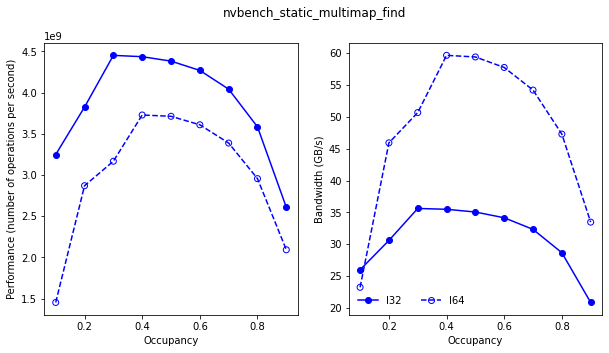

In [8]:
for bm in unique_bms:
    tmpdf = perfdf[perfdf["Benchmark"] == bm]    
    unique_labels = tmpdf["Label"].unique()
    
    if bm == 'nvbench_static_multimap_find':
        plot_perf(bm, tmpdf, "Occupancy", unique_labels)

### Multi-Value Retrieval

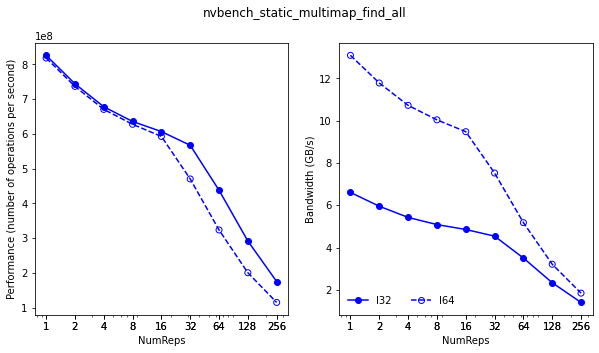

In [9]:
for bm in unique_bms:
    tmpdf = perfdf[perfdf["Benchmark"] == bm]
    unique_labels = tmpdf["Label"].unique()
    
    flag = "find_all" in bm
    if flag:
        plot_perf(bm, tmpdf, "NumReps", unique_labels, flag)